In [110]:
import pandas as pd 
import numpy as np

In [111]:
pd.pandas.set_option('display.max_columns', None)

In [112]:
df = pd.read_csv('predict_podcast_listening_train.csv', nrows =1000)
# df

In [113]:
df.head(100)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Mystery Matters,Episode 40,94.45,True Crime,53.37,Friday,Afternoon,36.36,0.0,Positive,66.59645
96,96,Home & Living,Episode 49,60.26,Lifestyle,34.26,Friday,Evening,51.18,1.0,Neutral,48.28618
97,97,Global News,Episode 85,26.72,News,60.73,Monday,Afternoon,24.90,2.0,Neutral,21.17921
98,98,Life Lessons,Episode 67,35.51,Lifestyle,94.42,Thursday,Evening,48.02,1.0,Neutral,24.11502


In [114]:
df.set_index("id", inplace= True )

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Podcast_Name                 1000 non-null   object 
 1   Episode_Title                1000 non-null   object 
 2   Episode_Length_minutes       897 non-null    float64
 3   Genre                        1000 non-null   object 
 4   Host_Popularity_percentage   1000 non-null   float64
 5   Publication_Day              1000 non-null   object 
 6   Publication_Time             1000 non-null   object 
 7   Guest_Popularity_percentage  810 non-null    float64
 8   Number_of_Ads                1000 non-null   float64
 9   Episode_Sentiment            1000 non-null   object 
 10  Listening_Time_minutes       1000 non-null   float64
dtypes: float64(5), object(6)
memory usage: 93.8+ KB


In [116]:
df.isna().sum()

Podcast_Name                     0
Episode_Title                    0
Episode_Length_minutes         103
Genre                            0
Host_Popularity_percentage       0
Publication_Day                  0
Publication_Time                 0
Guest_Popularity_percentage    190
Number_of_Ads                    0
Episode_Sentiment                0
Listening_Time_minutes           0
dtype: int64

In [117]:
import seaborn as sns
# cor = df.corr()
dff = df.drop(columns = ["Listening_Time_minutes"] , axis= 1)
dff.columns
# df.columns
# sns.heatmap(cor , annot= True )
# plt.show()

Index(['Podcast_Name', 'Episode_Title', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment'],
      dtype='object')

In [118]:
numeric_columns = [feature for feature in df.columns if df[feature].dtype == 'float64']
numeric_columns

['Episode_Length_minutes',
 'Host_Popularity_percentage',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Listening_Time_minutes']

In [119]:
import matplotlib.pyplot as plt

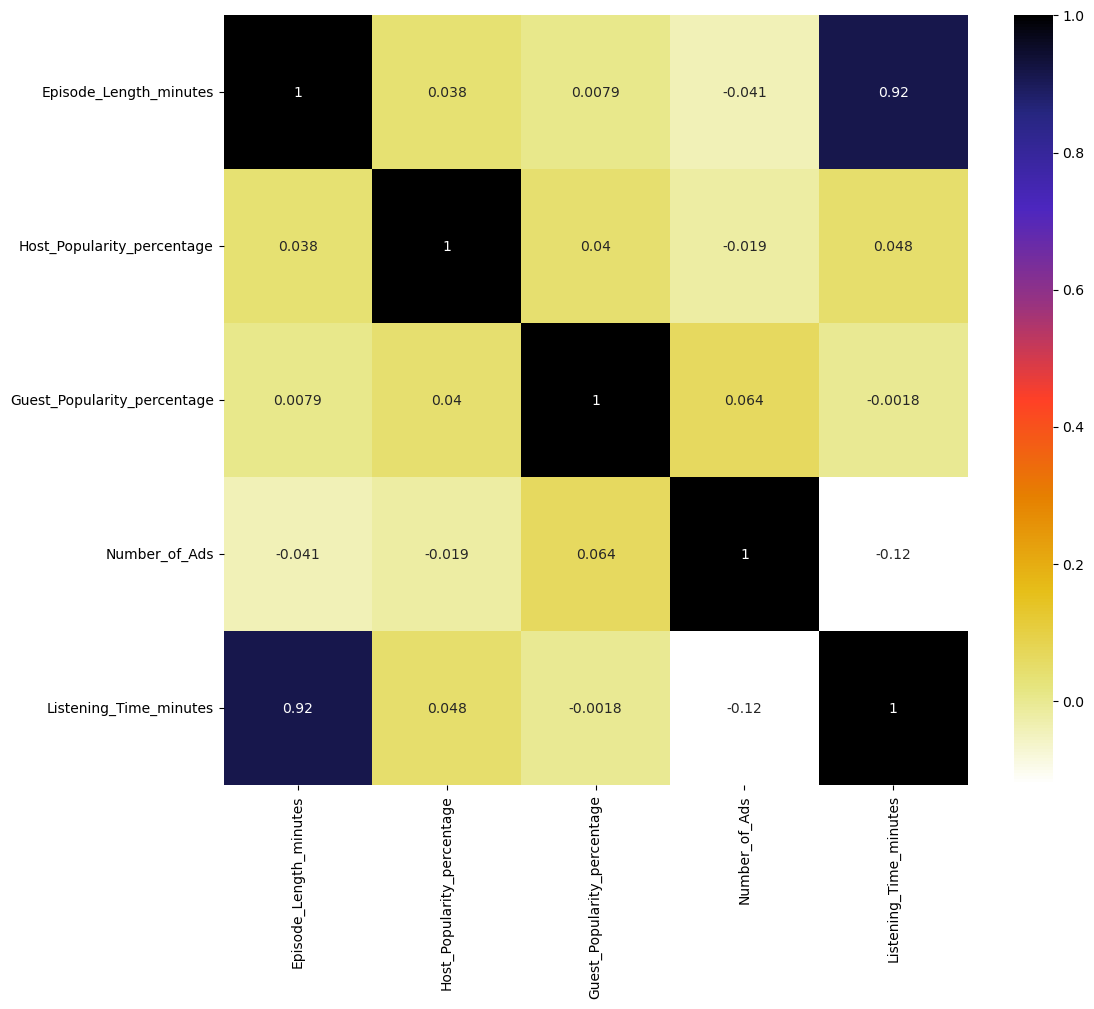

In [120]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df[numeric_columns].corr()
sns.heatmap(cor , annot= True , cmap = plt.cm.CMRmap_r)
plt.show()

In [121]:
df[numeric_columns].corr()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Episode_Length_minutes,1.000000,0.038425,0.007853,-0.041390,0.916574
Host_Popularity_percentage,0.038425,1.000000,0.040153,-0.018824,0.048084
Guest_Popularity_percentage,0.007853,0.040153,1.000000,0.064002,-0.001805
Number_of_Ads,-0.041390,-0.018824,0.064002,1.000000,-0.122958
Listening_Time_minutes,0.916574,0.048084,-0.001805,-0.122958,1.000000


In [122]:
def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)) :
        for j in range(i) :
            if abs(corr_matrix.iloc[i,j]) > threshold :
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [123]:
corr_features = correlation(df[numeric_columns] , 0.3)
len(set(corr_features))
corr_features 

{'Listening_Time_minutes'}

In [124]:
# numeric_columns.remove('Listening_Time_minutes')
numeric_columns

['Episode_Length_minutes',
 'Host_Popularity_percentage',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Listening_Time_minutes']

In [125]:
df2 = df.sort_values(by = ['Podcast_Name' , 'Episode_Title' , 'Publication_Time'] , ascending= True)
df2.head(10)

# df3 = df.sort_values(by= ['Publication_Time'] , ascending= True)
# df3[df3['Publication_Time'] == 'Evening'].head(50)

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
148,Athlete's Arena,Episode 1,78.97,Sports,30.64,Friday,Afternoon,2.40,1.0,Neutral,55.44236
45,Athlete's Arena,Episode 1,11.68,Sports,39.19,Saturday,Morning,34.51,1.0,Negative,7.04845
222,Athlete's Arena,Episode 10,111.10,Sports,76.68,Monday,Evening,87.10,1.0,Negative,93.35949
261,Athlete's Arena,Episode 100,9.30,Sports,31.30,Friday,Night,11.47,1.0,Neutral,7.53334
698,Athlete's Arena,Episode 11,NaN,Sports,82.35,Friday,Night,NaN,2.0,Negative,44.21847
84,Athlete's Arena,Episode 15,87.96,Sports,33.56,Wednesday,Evening,71.53,1.0,Positive,73.42127
256,Athlete's Arena,Episode 15,7.15,Sports,88.31,Saturday,Morning,21.41,1.0,Negative,0.00000
990,Athlete's Arena,Episode 15,47.87,Sports,91.90,Saturday,Morning,48.62,1.0,Negative,32.99547
469,Athlete's Arena,Episode 23,64.00,Sports,26.45,Sunday,Evening,NaN,2.0,Neutral,47.51920


# Categorical Data

In [126]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype == 'object' ]
categorical_cols
# df.dtypes

['Podcast_Name',
 'Episode_Title',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# print(label_encoder)
for feature in categorical_cols:
    df2[feature] = le.fit_transform(df2[feature])
df2


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
148,0,0,78.97,7,30.64,0,0,2.40,1.0,1,55.44236
45,0,0,11.68,7,39.19,2,2,34.51,1.0,0,7.04845
222,0,1,111.10,7,76.68,1,1,87.10,1.0,0,93.35949
261,0,2,9.30,7,31.30,0,3,11.47,1.0,1,7.53334
698,0,3,NaN,7,82.35,0,3,NaN,2.0,0,44.21847
...,...,...,...,...,...,...,...,...,...,...,...
151,47,78,NaN,6,45.25,5,1,9.72,3.0,2,40.93952
529,47,79,97.64,6,81.92,0,3,NaN,2.0,1,54.42160
510,47,80,NaN,6,38.73,3,0,48.99,1.0,2,53.09000


In [130]:
df2['Episode_Length_minutes'] = df2['Episode_Length_minutes'].fillna(df2['Episode_Length_minutes'].mean())

In [131]:
s = 'Guest_Popularity_percentage'
df2[s] = df2[s].fillna(df2[s].mean()) 

In [132]:
df2.head(50)

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
148,0,0,78.970000,7,30.64,0,0,2.400000,1.0,1,55.44236
45,0,0,11.680000,7,39.19,2,2,34.510000,1.0,0,7.04845
222,0,1,111.100000,7,76.68,1,1,87.100000,1.0,0,93.35949
261,0,2,9.300000,7,31.30,0,3,11.470000,1.0,1,7.53334
698,0,3,64.985315,7,82.35,0,3,51.060617,2.0,0,44.21847
84,0,7,87.960000,7,33.56,6,1,71.530000,1.0,2,73.42127
256,0,7,7.150000,7,88.31,2,2,21.410000,1.0,0,0.00000
990,0,7,47.870000,7,91.90,2,2,48.620000,1.0,0,32.99547
469,0,16,64.000000,7,26.45,3,1,51.060617,2.0,1,47.51920


In [ ]:
# df2.groupby(['Podcast_Name'])['Episode_Length_minutes'].median()

Podcast_Name
0     62.360
1     70.315
2     66.220
3     80.020
4     49.305
5     71.190
6     68.915
7     43.900
8     63.020
9     42.755
10    43.690
11    84.505
12    68.215
13    55.185
14    60.295
15    59.125
16    81.300
17    51.420
18    81.870
19    79.720
20    75.495
21    66.970
22    57.385
23    52.160
24    86.830
25    55.390
26    62.315
27    53.205
28    83.045
29    67.500
30    80.110
31    79.665
32    63.060
33    62.040
34    59.940
35    44.280
36    62.945
37    75.020
38    51.435
39    67.050
40    49.310
41    70.450
42    73.010
43    49.990
44    65.470
45    70.495
46    59.805
47    72.430
Name: Episode_Length_minutes, dtype: float64

In [ ]:
# df2.groupby(['Podcast_Name'])['Episode_Length_minutes'].mean()

Podcast_Name
0     58.913103
1     67.150000
2     62.762174
3     64.636154
4     50.822500
5     62.276923
6     65.497000
7     56.217500
8     64.352000
9     58.052000
10    48.756087
11    78.484809
12    62.943000
13    57.086364
14    65.020385
15    67.135000
16    72.006471
17    62.070000
18    78.534375
19    69.674444
20    79.714545
21    62.483333
22    65.546875
23    54.721053
24    72.232143
25    62.545455
26    59.040000
27    61.178636
28    78.381000
29    61.146154
30    73.334483
31    71.530556
32    66.297222
33    63.306429
34    61.199474
35    58.035000
36    65.846500
37    74.690000
38    59.116250
39    67.401429
40    58.481579
41    74.818667
42    70.700400
43    57.588261
44    66.078571
45    73.990385
46    59.045714
47    70.685714
Name: Episode_Length_minutes, dtype: float64

In [ ]:
# df2['Episode_Length_minutes'] = df2.groupby(['Podcast_Name'])['Episode_Length_minutes'].transform(lambda x : x.fillna(x.mean()))
# df2

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
148,0,0,78.970000,7,30.64,0,0,2.40,1.0,1,55.44236
45,0,0,11.680000,7,39.19,2,2,34.51,1.0,0,7.04845
222,0,1,111.100000,7,76.68,1,1,87.10,1.0,0,93.35949
261,0,2,9.300000,7,31.30,0,3,11.47,1.0,1,7.53334
698,0,3,58.913103,7,82.35,0,3,NaN,2.0,0,44.21847
...,...,...,...,...,...,...,...,...,...,...,...
151,47,78,70.685714,6,45.25,5,1,9.72,3.0,2,40.93952
529,47,79,97.640000,6,81.92,0,3,NaN,2.0,1,54.42160
510,47,80,70.685714,6,38.73,3,0,48.99,1.0,2,53.09000


In [25]:
df2.head(50)

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
148,0,0,78.970000,7,30.64,0,0,2.40,1.0,1,55.44236
45,0,0,11.680000,7,39.19,2,2,34.51,1.0,0,7.04845
222,0,1,111.100000,7,76.68,1,1,87.10,1.0,0,93.35949
261,0,2,9.300000,7,31.30,0,3,11.47,1.0,1,7.53334
698,0,3,58.913103,7,82.35,0,3,NaN,2.0,0,44.21847
84,0,7,87.960000,7,33.56,6,1,71.53,1.0,2,73.42127
256,0,7,7.150000,7,88.31,2,2,21.41,1.0,0,0.00000
990,0,7,47.870000,7,91.90,2,2,48.62,1.0,0,32.99547
469,0,16,64.000000,7,26.45,3,1,NaN,2.0,1,47.51920


In [26]:
df2['Guest_Popularity_percentage'] = df2.groupby(['Podcast_Name'])['Guest_Popularity_percentage'].transform(lambda x : x.fillna(x.mean()))

In [27]:
df2.isna().sum()

Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

# Segregate the data

In [133]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test , y_train , y_test = tts(df2.drop(columns= ['Listening_Time_minutes']) , df2['Listening_Time_minutes'] , random_state= 96 )

x_train.shape , y_train.shape

((750, 10), (750,))

# Random Forest Regressor

In [134]:
from sklearn.ensemble import RandomForestRegressor as rfr

rf_regressor = rfr(n_estimators= 50 , random_state= 40)

rf_regressor.fit(x_train, y_train)

y_pred = rf_regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred)
y_pred


,0
0,36.468509
1,50.648966
2,2.904397
3,48.905695
4,14.168059
...,...
245,72.848440
246,74.869921
247,32.949594
248,55.877413


In [135]:
def random_elbow(k):
    test_n = []
    for i in k:
        rndm = rfr(n_estimators= i , random_state= 100)
        rndm.fit(x_train ,y_train )
        pred = rndm.predict(x_test)
        pred = mse(pred , y_test)
        test_n.append(pred)
    return test_n

In [136]:
k = range(2, 100)
res = random_elbow(k)

Text(0.5, 1.0, 'Random Forest n estimator values')

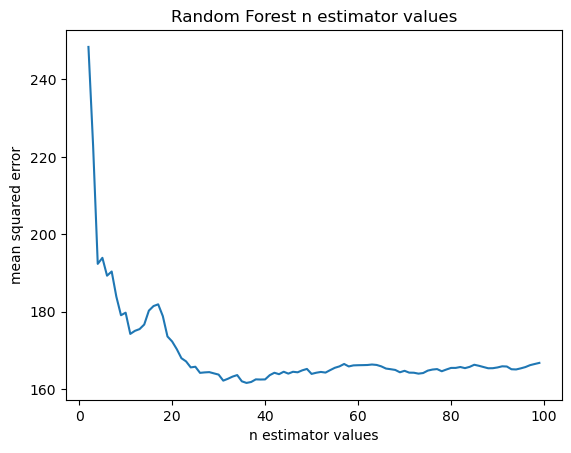

In [137]:
plt.plot(k , res)
plt.xlabel('n estimator values')
plt.ylabel('mean squared error')
plt.title('Random Forest n estimator values')

In [138]:
from sklearn.ensemble import RandomForestRegressor as rfr

rf_regressor = rfr(n_estimators= 40 , random_state= 40)

rf_regressor.fit(x_train, y_train)

y_pred = rf_regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,33.825174
1,50.489119
2,2.985861
3,51.071385
4,14.362106
...,...
245,71.344825
246,75.715607
247,31.658953
248,56.388675


In [139]:
y_test = pd.DataFrame(y_test)
y_test

,Listening_Time_minutes
id,
547,33.82439
40,50.05332
170,3.13766
424,53.17637
347,9.28000
...,...
981,100.25738
569,86.36628
132,41.39249


In [140]:
from sklearn.metrics import mean_squared_error as mse
k = mse(y_pred , y_test)
print(k)

168.5035235776072


## KNN regression

In [66]:
pip install KNeighborsRegressor

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement KNeighborsRegressor (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for KNeighborsRegressor


In [68]:
from sklearn.neighbors import KNeighborsRegressor as KNN

reg = KNN(n_neighbors= 8)

reg.fit(x_train , y_train)

y_pred = reg.predict(x_test)
y_pred

array([36.05590375, 46.20513625,  5.94624375, 52.8740125 , 21.10252   ,
       81.70896625, 44.34806125, 58.91589625, 32.8436225 , 54.65886875,
       39.87470625, 15.88278625, 13.5811075 , 65.52194125, 24.2477775 ,
       16.91952375, 82.1674725 , 15.32228125, 21.80988375, 83.11841   ,
       35.21346625, 83.21565   , 75.7771125 , 21.8705625 , 25.26626875,
       72.45985375, 71.71856   , 20.99782   , 39.213645  , 63.6595225 ,
       48.047795  , 19.75675375, 42.6723175 , 81.508195  , 37.35619   ,
       29.74433375, 41.26766   , 54.428925  , 41.51028625, 78.42023125,
       27.67666125, 15.3487275 , 71.8707175 , 53.80197   , 44.95708625,
       47.8266575 , 36.81355875, 75.5380825 , 26.738795  , 34.52514375,
       80.311745  , 76.99664125, 79.90330375, 24.88433875, 45.4706425 ,
       26.2624525 , 26.602485  , 75.40535125, 53.31540375, 35.3423175 ,
       26.271635  , 21.09528   , 77.5808025 , 35.26892   , 75.10196   ,
       24.44238875, 21.97435   , 77.88778375, 81.027255  , 36.80

In [69]:
# elbow for Regressor

def elbow(k):
    test_mse = []
    for i in k:
        reg = KNN(n_neighbors= i)
        reg.fit(x_train , y_train)
        tmp = reg.predict(x_test)
        tmp = mse(tmp , y_test)
        test_mse.append(tmp)
    return test_mse


In [70]:
#defining k range 
k = range(1 , 40)

test = elbow(k)

Text(0.5, 1.0, 'elbow curve for test')

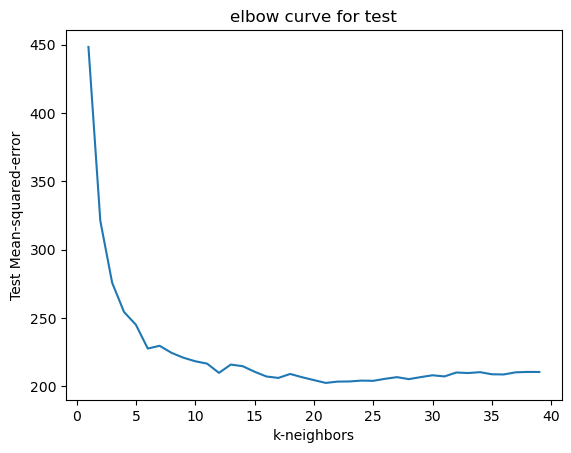

In [71]:
# plotting the curve
plt.plot(k , test)
plt.xlabel('k-neighbors')
plt.ylabel('Test Mean-squared-error')
plt.title('elbow curve for test')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNN

reg = KNN(n_neighbors= 1])

reg.fit(x_train , y_train)

y_pred = reg.predict(x_test)
y_pred

array([37.45345067, 43.35028867,  9.90319467, 47.91645   , 29.83237867,
       81.74912067, 39.29225533, 56.294782  , 29.90731067, 50.62225667,
       38.06882   , 18.696522  , 12.577828  , 64.367444  , 32.335348  ,
       20.57242067, 77.87174267, 15.05920667, 22.77932   , 71.84772933,
       35.39197667, 81.501434  , 80.29887667, 21.86279   , 23.90719867,
       65.740772  , 70.669612  , 21.61084133, 37.75259   , 64.71967267,
       54.58070667, 20.828224  , 46.300038  , 72.90419667, 35.13691933,
       41.07163   , 35.83302867, 55.299902  , 34.63126333, 79.779592  ,
       24.98707267, 15.90524   , 72.78057667, 56.15439267, 40.735586  ,
       45.481466  , 41.290826  , 68.42395067, 29.880658  , 32.71282   ,
       78.72692667, 81.768878  , 74.549906  , 33.79007467, 38.94415933,
       28.25565133, 31.55758733, 81.81052133, 56.013458  , 41.347158  ,
       23.93428133, 22.22040733, 78.58786867, 33.04953133, 70.448822  ,
       22.25444   , 21.46989733, 78.74135133, 79.283346  , 36.33

In [75]:
from sklearn.metrics import mean_squared_error as mse
k = mse(y_pred , y_test )
print(k)

210.65112697678836


# Using XGBoost

In [46]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 2.4/150.0 MB 4.6 MB/s eta 0:00:32
   - -------------------------------------- 3.9/150.0 MB 5.5 MB/s eta 0:00:27
   - -------------------------------------- 5.8/150.0 MB 6.2 MB/s eta 0:00:24
   - -------------------------------------- 7.3/150.0 MB 6.5 MB/s eta 0:00:23
   -- ------------------------------------- 9.4/150.0 MB 7.0 MB/s eta 0:00:21
   --- ------------------------------------ 11.8/150.0 MB 7.6 MB/s eta 0:00:19
   --- ------------------------------------ 14.4/150.0 MB 8.1 MB/s eta 0:00:17
   ---- ----------------------------------- 16.8/150.0 MB 8.5 MB/s eta 0:00:16
   ----- ---------------------------------- 19.1/150.0 MB 8.8 MB/s eta 0:00:15
   ----- ---------------------------------- 19.9/150.0 MB 8.3 MB/s eta 0:0


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators = 4111)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(x_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=4111,
             n_jobs=None, num_parallel_tree=None, ...)

In [61]:
xgboost_pred = my_model.predict(x_test)
xgboost_pred

array([ 4.85477104e+01,  4.80732346e+01,  3.62860298e+00,  4.89139671e+01,
        2.21366024e+01,  8.06429672e+01,  4.51257935e+01,  6.07586098e+01,
        2.00747395e+01,  5.99337540e+01,  3.14549122e+01,  1.58752871e+01,
        7.25910568e+00,  6.68336105e+01,  4.46793060e+01,  8.66017628e+00,
        8.60619965e+01,  1.67909546e+01,  1.59278717e+01,  7.46942139e+01,
        3.47799530e+01,  9.36737137e+01,  7.89971542e+01,  2.23915710e+01,
        1.35535746e+01,  7.43103485e+01,  7.32107010e+01,  1.77673359e+01,
        4.61918488e+01,  5.69484062e+01,  6.00136032e+01,  2.05554581e+01,
        5.25313988e+01,  8.04277573e+01,  2.68377609e+01,  3.32178040e+01,
        3.09938869e+01,  5.29706383e+01,  2.93346710e+01,  7.24276276e+01,
        2.64753914e+01,  8.49967480e+00,  8.09453278e+01,  6.68770676e+01,
        5.16778412e+01,  4.56294212e+01,  3.82897224e+01,  6.90771942e+01,
        3.02530766e+01,  2.93066959e+01,  8.00696411e+01,  7.51590576e+01,
        7.14348679e+01,  

In [62]:
error = mse(xgboost_pred , y_test)
error

203.83347610817853

In [ ]:
# df3 = df2.dropna(subset = ['Episode_Length_minutes'])
# df3.loc[200:].head(50)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# rf_classifier.fit(x_train, y_train)


# # Make predictions
# y_pred = rf_classifier.predict(x_test)
# y_pred

In [ ]:
# data = df.copy()
# data.head()
# data.isna().sum()

In [ ]:
# data['Episode_Length_minutes'] = np.where(data['Episode_Length_minutes'].isna() , 1 , 0 )
# data

In [ ]:
dic = {
    'name' : ['Rishabh' , 'ashish' , 'sandeep'],
    'Roll' : ['20', '21' , '25']
}

In [ ]:
dic = pd.DataFrame(dic)
dic

,name,Roll
0,Rishabh,20
1,ashish,21
2,sandeep,25


In [ ]:
lis = [1,2,22]
lis.append(dic)
lis

[1,
 2,
 22,
       name Roll
 0  Rishabh   20
 1   ashish   21
 2  sandeep   25]

In [ ]:
lis[3].loc[0:3 , 'name']

IndexingError: Too many indexers